In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.shape

(200, 5)

In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [18]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
#EDA
df.drop(columns={'CustomerID','Gender'},inplace=True)

In [20]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


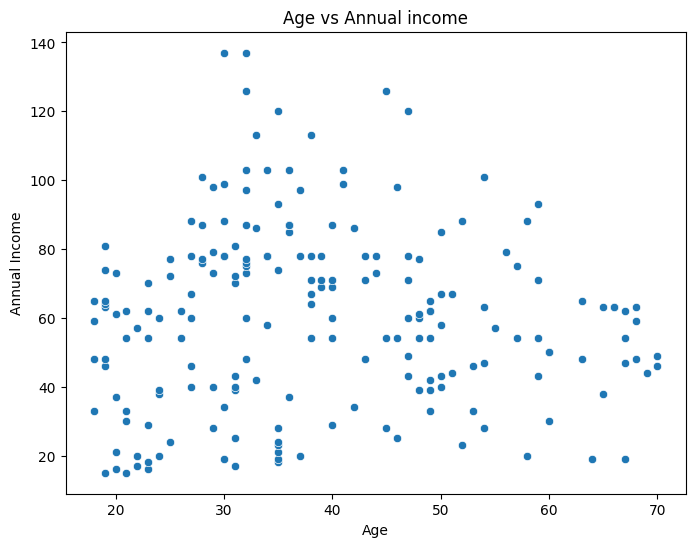

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df)
plt.title('Age vs Annual income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

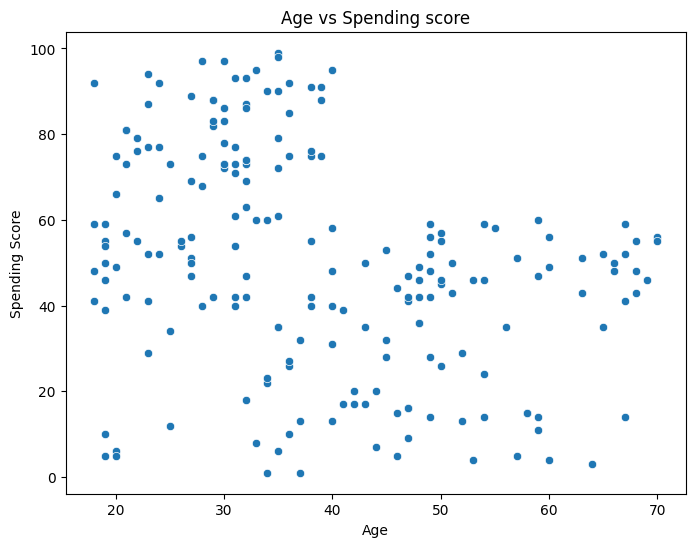

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df)
plt.title('Age vs Spending score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [23]:
#Feature Engineering
def skewness_name(skewness):
    if skewness>0:
        return 'Right skewed'
    elif skewness<0:
        return 'Left skewed'
    else:
        return 'Normal'
print('Skewness of Age:',skewness_name(df['Age'].skew()))
print('Skewness of Annual Income',skewness_name(df['Annual Income (k$)'].skew()))
print('Skewness of Spending score',skewness_name(df['Spending Score (1-100)'].skew()))

Skewness of Age: Right skewed
Skewness of Annual Income Right skewed
Skewness of Spending score Left skewed


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
df=pd.DataFrame(scaled_data,columns=df.columns)
df.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [25]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(df)
df['Cluster']=kmeans.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


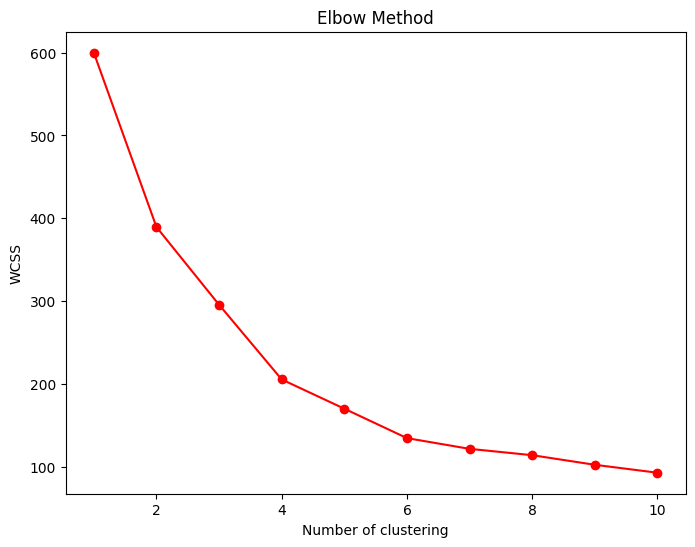

In [26]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df.drop("Cluster",axis=1))
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker="o",color="red")
plt.title("Elbow Method")
plt.xlabel("Number of clustering")
plt.ylabel("WCSS")
plt.show()


Text(0, 0.5, 'Annual Income (k$)')

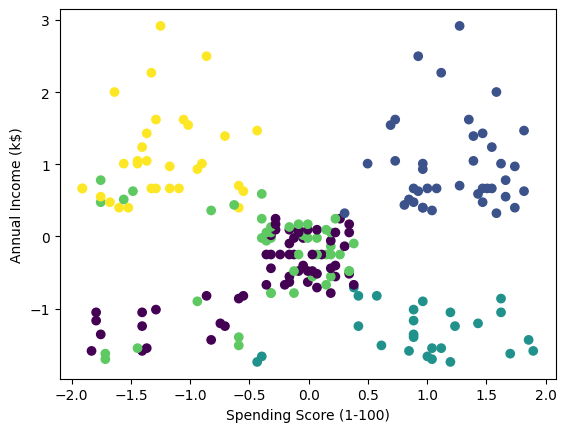

In [27]:
plt.scatter(df['Spending Score (1-100)'],
            df["Annual Income (k$)"],
            c =df['Cluster'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

In [28]:
df.to_csv("Clustered_mall_customers.csv",index=False)

In [30]:
df2 = pd.read_csv("Clustered_mall_customers.csv")


In [31]:
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


In [32]:
X = df2.drop("Cluster",axis=1)
y = df2["Cluster"]

In [33]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
model = LogisticRegression()
model.fit(x_tr,y_tr)

y_pred = model.predict(x_te)

